# Naive Bayes Algorithm


Classify two sets of points using Naive_bayes.GaussianNB from sklearn


In [2]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2]) #labels: two classes 1 and 2
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB() # create a classifier 
clf.fit(X, Y)  #x and y are training data for input
# => GaussianNB(prior=None)
print(clf.predict([[-0.8, -1]]))
# =>[1]



clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB(priors=None)
print(clf_pf.predict([[-0.8, -1]]))
# =>[1]


[1]
[1]


Example about classfying two sets of points:

The next cell includes generate data

In [3]:
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

Visualize data


In [4]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print image_start+json.dumps(data)+image_end

Classify Data

In [5]:
from sklearn.naive_bayes import GaussianNB

def classify(features_train, labels_train):  
    clf = GaussianNB()
    a = clf.fit(features_train, labels_train)
    return a

Main Function


In [6]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """



import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
output_image("test.png", "png", open("test.png", "rb").read())






BEGIN_IMAGE_f9825uweof8jw9fj4r8{"bytes": "iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz\nAAALEgAACxIB0t1+/AAAIABJREFUeJztnXt4VNW99z8DCQiKAeTySgIGmmqFEKAkorWleOhbQEu8\n1At4aRUBe0CLtadqaaXRx6KtVuRIqYWXqhxLaKseISq0gkdtPVZIEQFpS7TBkLRyEUUEuWSy3z8m\nEzKTvWf2zL6ttef3eR6eMHt29l6z9mR91++yfitiGIaBIAiCIGhGp6AbIAiCIAjZIAImCIIgaIkI\nmCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBoiQiYIAiCoCUiYIIgCIKWiIAJgiAIWiICJgiCIGiJ\nCJggCIKgJSJggiAIgpaIgAmCIAhaIgImCIIgaIkImCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBo\niQiYIAiCoCUiYIIgCIKWiIAJgiAIWiICJgiCIGiJCJggCIKgJSJggiAIgpaIgAmCIAhaIgImCIIg\naIkImCAIgqAlImCCIAiCloiACYIgCFoiAiYIgiBoiQiYIAiCoCUiYIIgCIKWiIAJgiAIWiICJgiC\nIGhJXtAN8IrukQg9g26EIAgdGJDivQ+BT21epxvQE4i0O2YAH2VwjUzJ5p5BtLM9/YHOac6JArtb\n/3/stNPYt2+ft41yidAKWE/gpqAbIQhCB+aA5eTyGFADbHNwnY+Ahdk1zbN7lgLjgQLgALAee5/R\nDUqByUAXi/cN4Jl27akpLvahVe4QWgETMifIPzIhd1iP9YDahdh30M73riDD426Q7T23EdzfUvy+\nl2BuiR1G379zETAB6DhL69n6GvT9cnuNCH52xPvoMhLdanHsCtABzK2hA9k0SuF7ukG8z5MnDseA\ntf43xzVEwAQgNhAnz4gzmQ

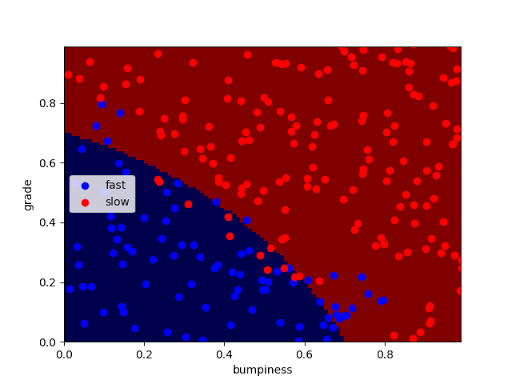

__Test Accuracy__

In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)


from sklearn.metrics import accuracy_score
print accuracy_score(pred, labels_test)

0.884


# Support Vector Machine


Maximize __Margin__: maximizes distance to nearest point

from sklearn import svm
>>> X = [[0, 0], [1, 1]]
>>> y = [0, 1]
>>> clf = svm.SVC()
>>> clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
>>> clf.predict([[2., 2.]])
array([1]

In [9]:
#Alternative way:

from sklearn.svm import SVC
clf = SVC(kernel = 'linear')#initialize a clf
clf.fit(features_train, labels_train)
pred = clf.predict(features_test) #note we only pass features 
    #rather than labels, because labels are something we
    #need to predict

from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)


__Non-linear decision boundary__

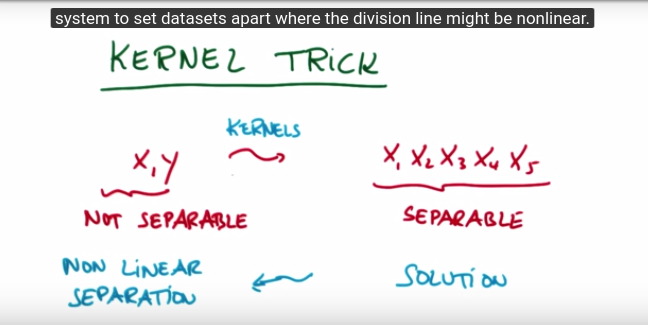

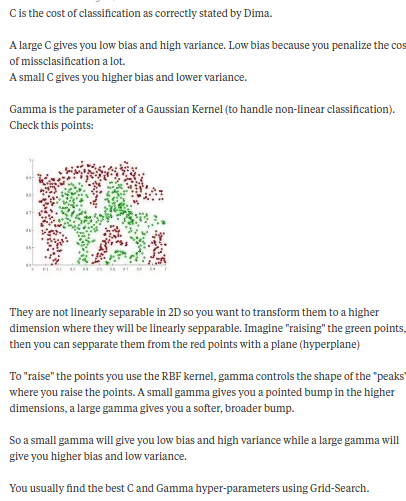

Avoid over-fitting by playing around with those three parameters